**Importing the required Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**Loading the dataset**

The dataset was already divided into training and testing set. If this would not have been the case, we would have manually divided the data set as 70 - 80% training set and remaining in the testing set by the code below.
> x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [3]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**Getting Familar with the Dataset**

In [4]:
print("X_train shape:", X_train.shape)
print(X_train[0])

X_train shape: (60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18

In [5]:
print("Y_train shape:", Y_train.shape)
print(Y_train[0])

Y_train shape: (60000,)
5


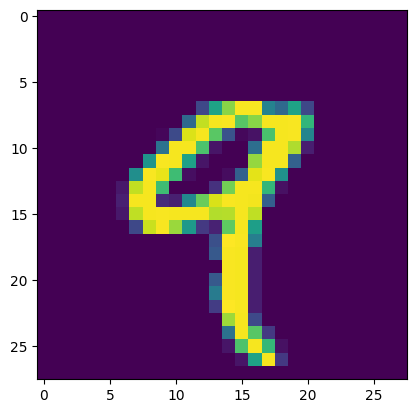

In [6]:
plt.imshow(X_train[4])

We will have to normalize the values present in the X_train and X_test for better training and results of the model.

In [7]:
x_train = tf.keras.utils.normalize(X_train, axis = 1)
x_test = tf.keras.utils.normalize(X_test, axis = 1)

In [8]:
x_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**Building the Model**
> We need to keep in mind that we have to flatten the x_train and x_test dataset

In [9]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.001))

In [13]:
model.fit(x_train, Y_train, epochs = 15, validation_split = 0.2)

Epoch 1/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0874 - val_loss: 0.1198
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0647 - val_loss: 0.1083
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0481 - val_loss: 0.1086
Epoch 4/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0377 - val_loss: 0.0985
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0289 - val_loss: 0.1024
Epoch 6/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0229 - val_loss: 0.1109
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0179 - val_loss: 0.1284
Epoch 8/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0153 - val_loss: 0.1154
Epoch 9/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0127 - val_loss: 0.1260
Epoch 10/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.012

In [14]:
y_prob = model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [15]:
y_prob

array([[2.5879612e-15, 6.4601308e-16, 1.0267208e-13, ..., 9.9999994e-01,
        7.9948621e-17, 1.0432399e-12],
       [6.2927320e-19, 5.7345031e-09, 9.9999994e-01, ..., 2.0424075e-17,
        1.9069716e-13, 3.3946640e-25],
       [7.5389289e-10, 9.9997789e-01, 2.0033627e-07, ..., 2.1865333e-05,
        1.5545551e-08, 1.5420283e-11],
       ...,
       [8.2201977e-22, 1.0297267e-14, 9.9072719e-17, ..., 1.9850123e-11,
        2.8569307e-14, 3.3866576e-10],
       [9.3099855e-13, 4.3107835e-13, 4.5889488e-15, ..., 3.5090163e-13,
        6.5378130e-09, 1.3495789e-16],
       [7.1757621e-11, 1.4821765e-17, 2.6360762e-15, ..., 8.5558371e-23,
        7.7658167e-16, 2.1558209e-18]], dtype=float32)

In [16]:
y_pred = y_prob.argmax(axis = 1)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.9739